# Downloading Overlays

This notebook demonstrates how to download an FPGA overlay and examine programmable logic state.  

## 1. Instantiating an overlay
To instantiate an overlay, a bitstream file name is passed to the Overlay class.

The bitstream file does not need a full path if it resides in the pynq package, but a full path can be used for any bitstream located on the Linux file system.  Two examples of overlay instantiation are shown below.



In [1]:
# Using base.bit located in pynq package
from pynq import Overlay
ol = Overlay("base.bit")

In the second case, users can use absolute file path to instantiate the overlay.

In [2]:
# Using the same bitstream, but with full path
from pynq import Overlay
ol = Overlay("/home/xilinx/pynq/bitstream/base.bit")

Now we can check the download timestamp for this overlay

In [3]:
ol.download()
ol.bitstream.timestamp

'2016/8/24 16:51:57 +582744'

## 2. Examining the PL state

While there can be multiple overlay instances in Python, there is only one bitstream that is currently loaded onto the programmable logic (PL). 

This bitstream state is held in the singleton class, PL, and is available for user queries.

In [4]:
from pynq import PL
PL.bitfile_name

'/home/xilinx/pynq/bitstream/base.bit'

In [5]:
PL.timestamp

'2016/8/24 16:51:57 +582744'

Users can verify whether an overlay instance is currently loaded using the Overlay is_loaded() method

In [6]:
ol.is_loaded()

True

## 3. Overlay downloading overhead

Finally, using Python, we can see the bitstream download time over 50 downloads.  

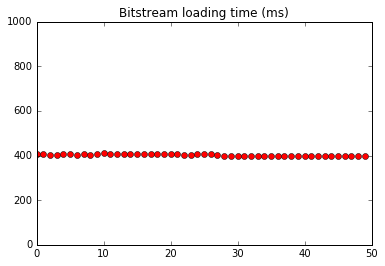

In [7]:
import time
import matplotlib.pyplot as plt
from pynq import Overlay

ol1 = Overlay("base.bit")
length = 50
log1 = []
for i in range(length):
    start = time.time()
    ol1.download()
    end = time.time()
    # Record milliseconds
    log1.append((end-start)*1000)

# Draw the figure
%matplotlib inline
plt.plot(range(length), log1, 'ro')
plt.title('Bitstream loading time (ms)')
plt.axis([0, length, 0, 1000])
plt.show()

del ol1